In [46]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from einops import rearrange
from sklearn.preprocessing import MinMaxScaler
import torch
import warnings
warnings.filterwarnings('ignore')

In [47]:
def matrixfactorization(y,r,lr):
    t,k,m = y.shape
    y = y.reshape(t*k,m)
    w = np.random.randn(t*k,r)
    h = np.random.randn(r,m)
    for i in range(500):
        ypred = np.dot(w,h)
        w2 = w.copy()
        w += 2*lr*np.dot(y-ypred,h.T)/(t*k)
        h += 2*lr*np.dot(w2.T,y-ypred)/m
    final = np.dot(w,h)
    return w,h,final

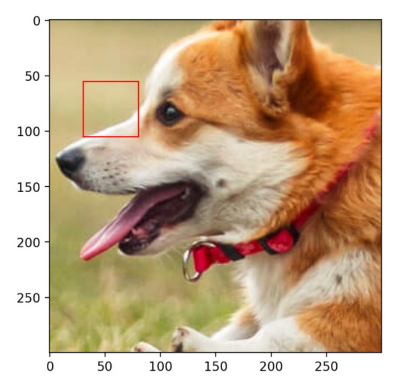

In [48]:
imag = torchvision.io.read_image('es335-24-fall-assignment-2-master/sample_images/2-3_colours.jpg')
plt.imshow(rearrange(imag, 'c h w -> h w c').numpy())
plt.axis('off')
plt.show()

# i,j = np.random.randint(100,201,2)
# print(i,j)
# y = imag.numpy()
# y = y[:,i:i+50,j:j+50]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


140 115
Test for r = 5
RMSE = 2.425283488584376
PSNR = 40.435553406968594


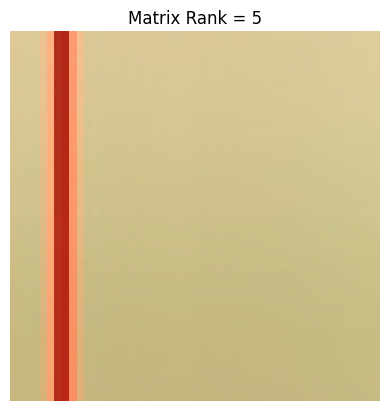

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test for r = 10
RMSE = 2.340712142347566
PSNR = 40.743843448175056


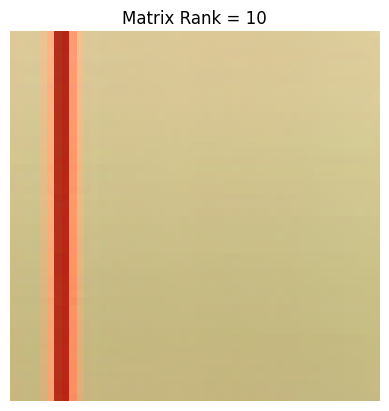

Test for r = 25


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


RMSE = 2.110829220946119
PSNR = 41.64174165594127


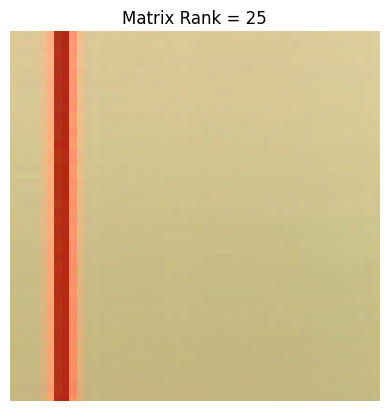

Test for r = 50
RMSE = 1.920034721908261
PSNR = 42.46462195755802


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


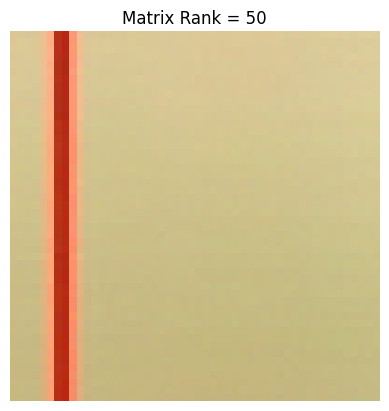

Test for r = 150


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


RMSE = 1.5857280136685905
PSNR = 44.126229637478


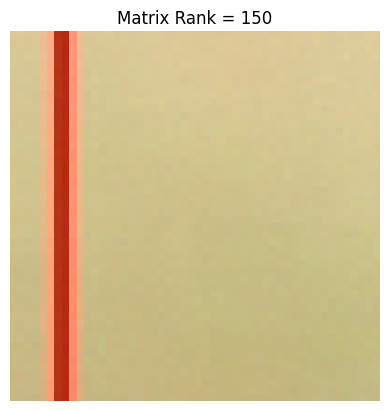

Test for r = 300
RMSE = 0.7690687008757193
PSNR = 50.41150086782488


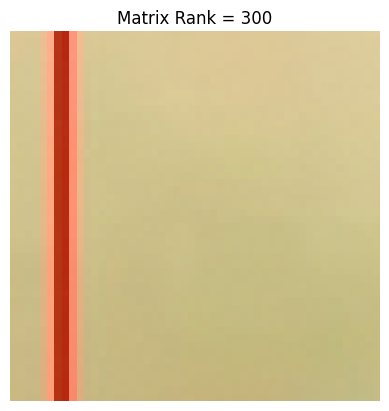

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


None
141 172
Test for r = 5
RMSE = 4.626503359269647
PSNR = 34.82574597184737


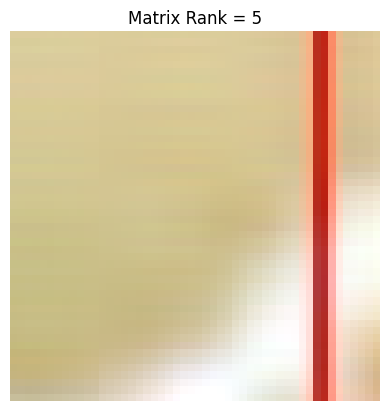

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test for r = 10
RMSE = 4.071428905597313
PSNR = 35.93586649588636


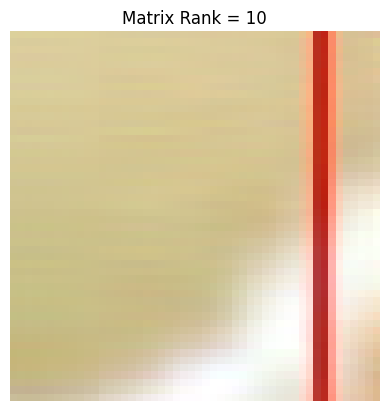

Test for r = 25


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


RMSE = 3.0863354753925676
PSNR = 38.34194099271584


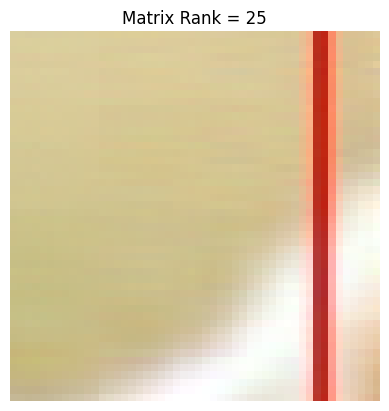

Test for r = 50
RMSE = 2.494500618026248

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



PSNR = 40.19113129119789


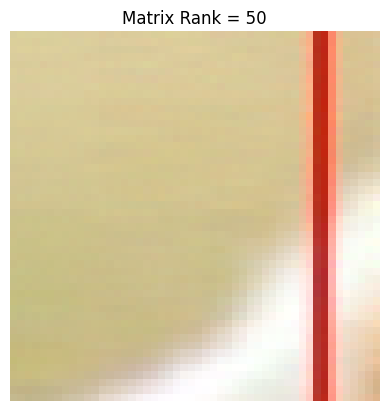

Test for r = 150


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


RMSE = 1.6095133840180804
PSNR = 43.99691175983974


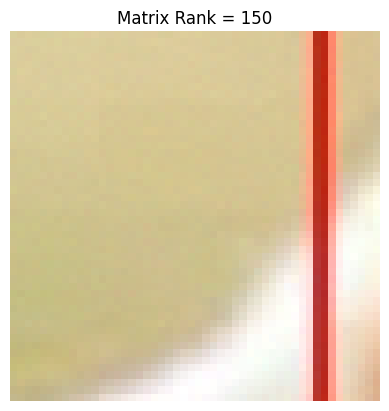

Test for r = 300


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


RMSE = 0.7681145747868608
PSNR = 50.42228349225766


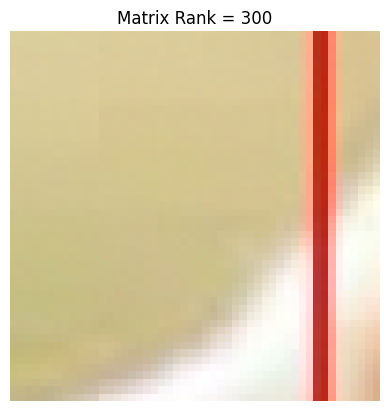

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


None
198 135
Test for r = 5
RMSE = 4.0931650345423405
PSNR = 35.8896184976153


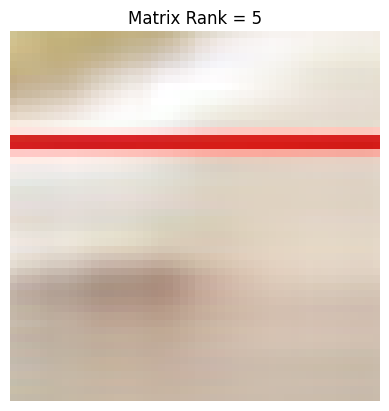

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test for r = 10
RMSE = 3.8013155617496426
PSNR = 36.53212513775343


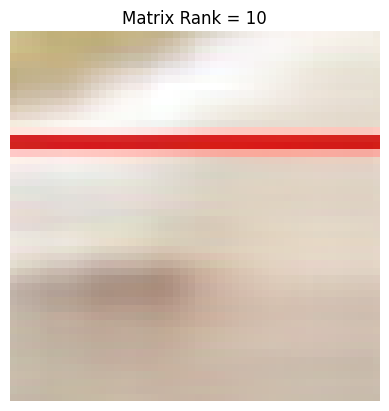

Test for r = 25


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


RMSE = 2.7503696721228827
PSNR = 39.34298219917775


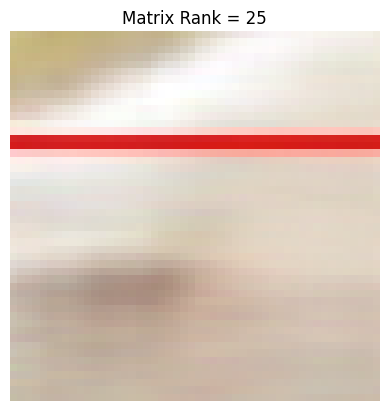

Test for r = 50


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


RMSE = 2.343302512836673
PSNR = 40.73423644386779


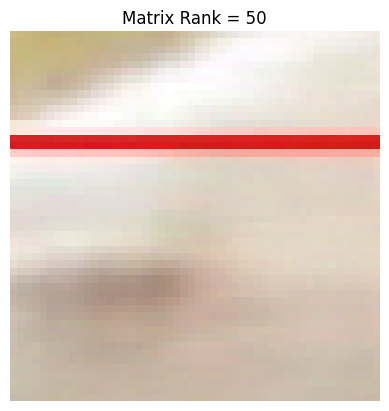

Test for r = 150


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


RMSE = 1.6156732342896567
PSNR = 43.96373300088092


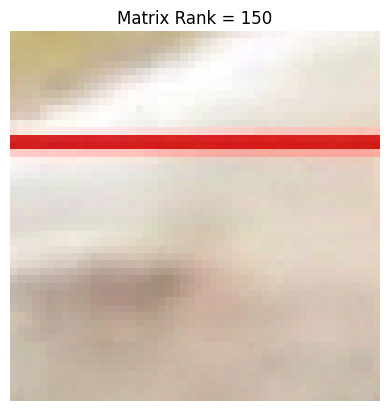

Test for r = 300


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


RMSE = 0.7694153624668538
PSNR = 50.40758654144991


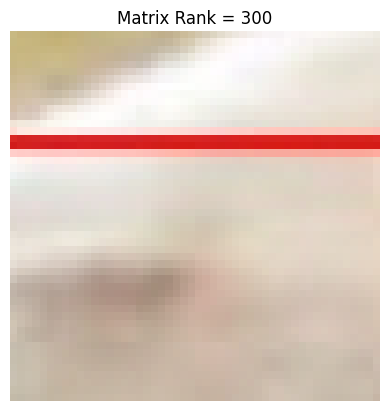

None


In [49]:

# plt.figure(figsize=(10, 3))
# plt.axis('off')
# plt.imshow(y, 'gray')
# plt.show()
def compress(imag, y, rval=None, retlist=None):
    if retlist is None:
        retlist = [False, 0, 0]
    if rval is None:
        rval = [5, 10, 25, 50, 150, 300]
    q,u,e = y.shape
    m = []
    if not retlist[0]:
        for r in rval:
            print(f"Test for r = {r}")
            w, h, img = matrixfactorization(y, r, 0.001)
            img = img.astype(int)
            img_f = img.reshape(int(q),int(u),int(e))
            rmse = np.sqrt(np.mean((y - img_f) ** 2))
            print(f"RMSE = {rmse}")
            if rmse != 0:
                print(f"PSNR = {20 * np.log10(255 / rmse)}")
            else:
                print(f"PSNR = {float('inf')}")
            
            # print(img_f)
            # print(img.shape)
            # cng = imag.numpy()
            # cng[:,120:214,120:218] = img_f
            # cng = torch.tensor(cng)
            m.append(img_f)
            img_f = torch.tensor(img_f)
            plt.title(f"Matrix Rank = {r}")
            plt.imshow(rearrange(img_f, 'c h w -> h w c').numpy())
            plt.axis('off')
            plt.show()
        # if retlist[0]:
        #     i = retlist[1]
        #     j = retlist[2]
        #     t = imag
        #     img_f = torch.tensor(img_f)
        #     t[:,i:i+50,j:j+50] = img_f
        #     plt.title(f"Replaced patch in original image")
        #     plt.imshow(rearrange(t, 'c h w -> h w c').numpy())
        #     plt.axis('off')
        #     plt.show()
        # #     rmse = np.sqrt(np.mean((imag.numpy() - t.numpy()) ** 2))
        # #     print(f"RMSE = {rmse}")
    else:
        for r in rval:
            w, h, img = matrixfactorization(y, r, 0.001)
            img = img.astype(int)
            img_f = img.reshape(int(q),int(u),int(e))
            m.append(img_f)
        return m
            
    
    # rmse = np.sqrt(np.mean((imag.numpy() - cng.numpy()) ** 2))
    # print(f"RMSE = {rmse}")
    # plt.imshow(rearrange(cng, 'c h w -> h w c').numpy())
    # plt.axis('off')
    # plt.show()
np.random.seed(2)
for _ in range(3):    
    i,j = np.random.randint(100,201,2)
    print(i,j)
    y = imag.numpy()
    y = y[:,i:i+50,j:j+50]
    # y = torch.tensor(y)
    # plt.title("OG")
    # plt.imshow(rearrange(y, 'c h w -> h w c').numpy())
    # plt.axis('off')
    # plt.show()
    # y=y.numpy()
    print(compress(imag,y,retlist=[False,i,j]))
    

Test for r = 5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


RMSE = 27.54035289652894
PSNR = 19.331413590309467


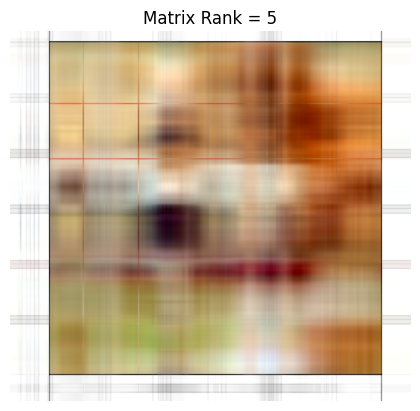

Test for r = 10


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


RMSE = 21.11708565958855
PSNR = 21.638123976607048


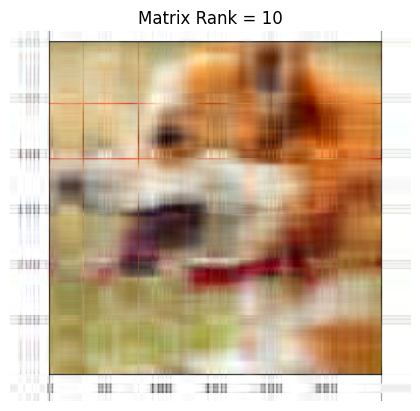

Test for r = 25


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


RMSE = 15.53732047655486
PSNR = 24.303281134805943


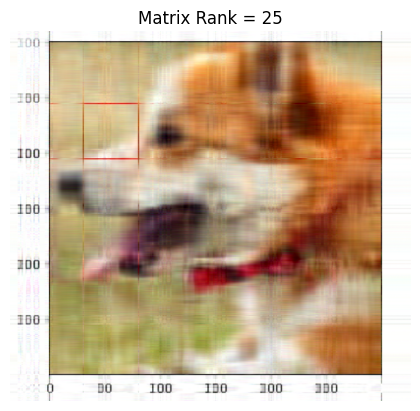

Test for r = 50


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


RMSE = 13.600653372923228
PSNR = 25.459608162687584


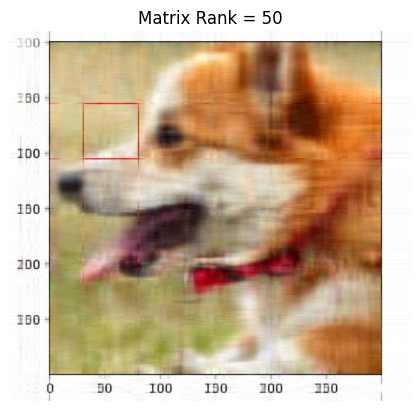

Test for r = 150


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


RMSE = 11.141002760108085
PSNR = 27.19231797220772


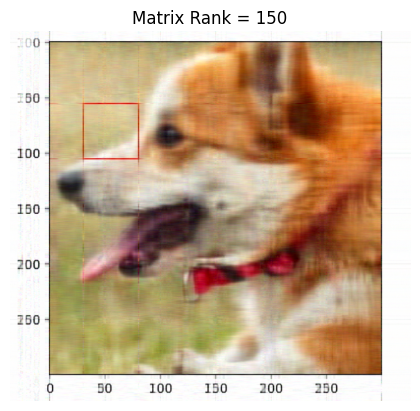

Test for r = 300


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


RMSE = 9.509251996690242
PSNR = 28.567876480206596


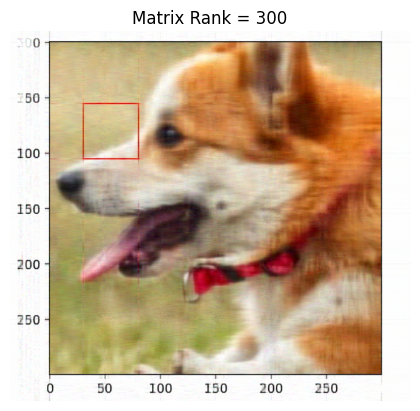

None


In [50]:
print(compress(imag,imag.numpy()))

    

140 115


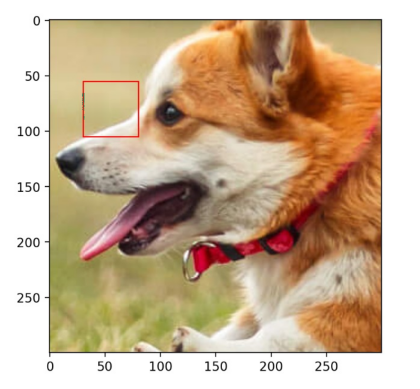

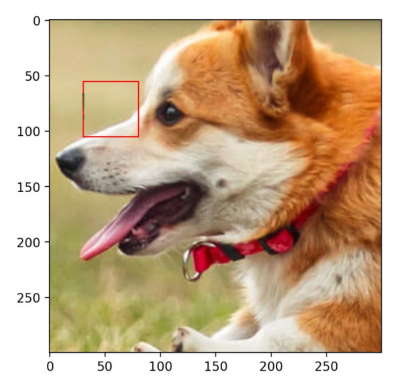

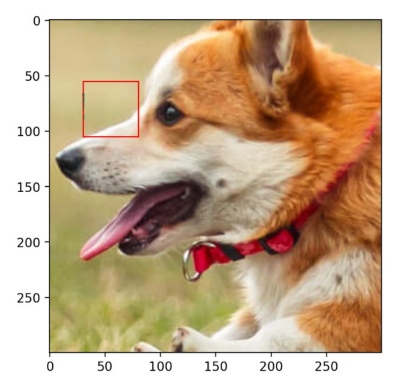

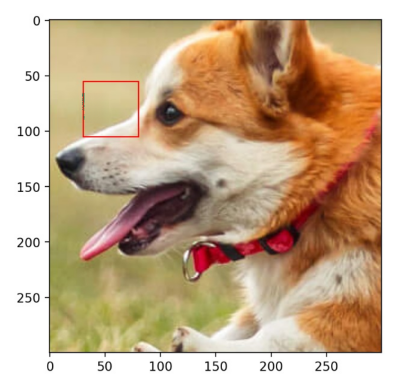

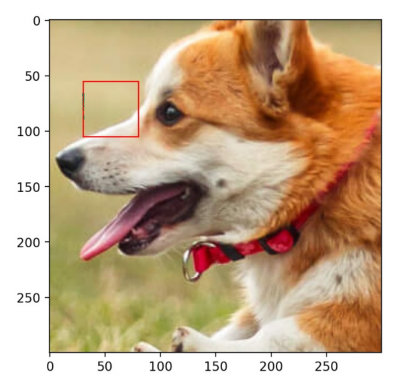

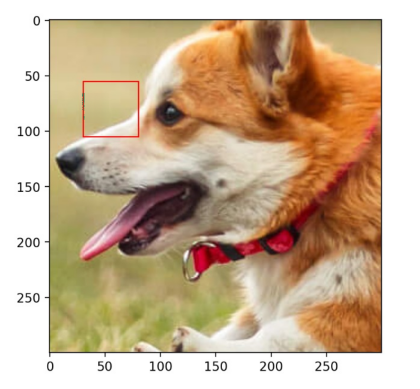

141 172


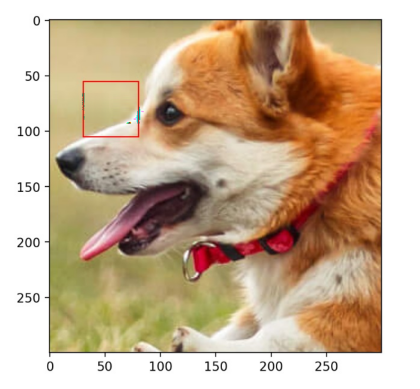

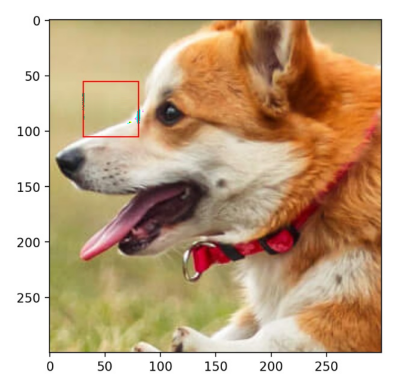

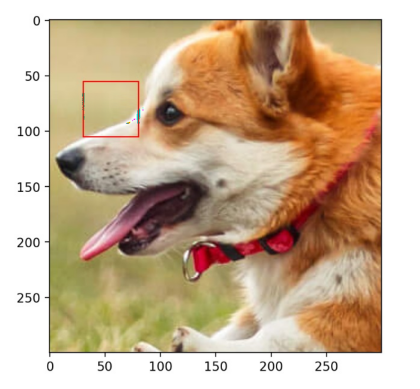

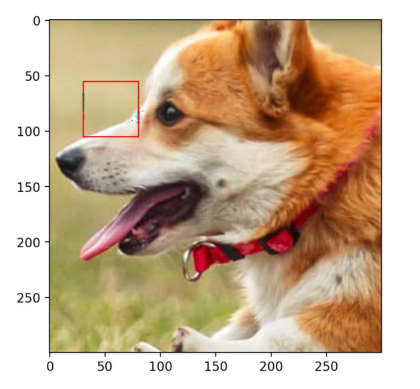

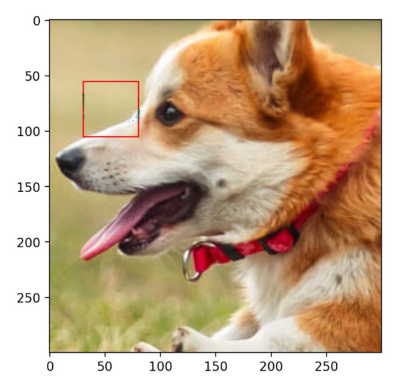

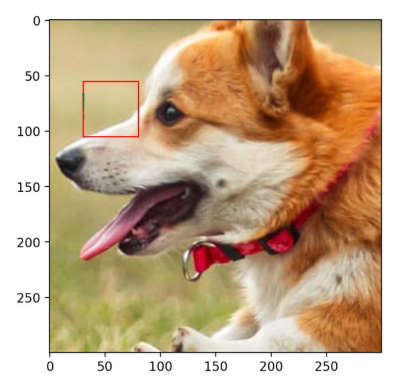

198 135


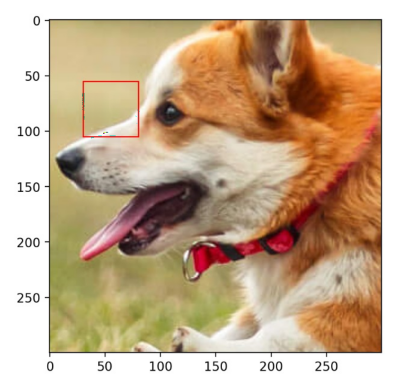

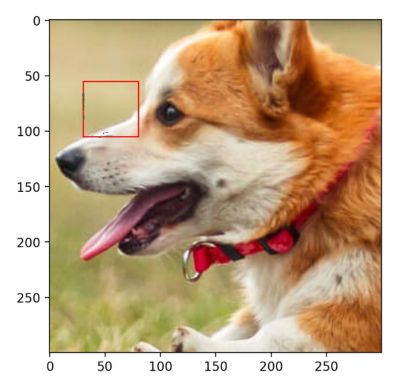

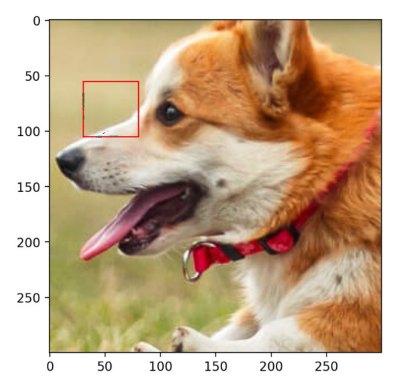

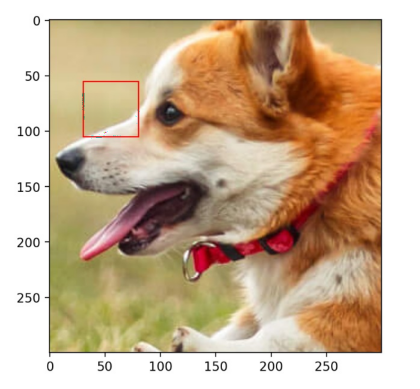

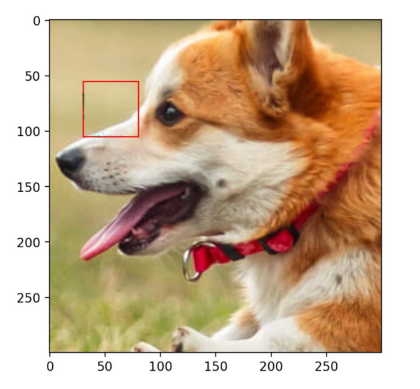

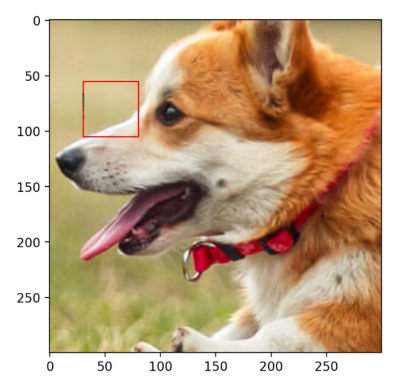

In [54]:
np.random.seed(2)
for _ in range(3):    
    i,j = np.random.randint(100,201,2)
    print(i,j)
    y = imag.numpy()
    y = y[:,i:i+50,j:j+50]
    k = compress(imag,y,retlist=[True,i,j])
    for w in k:
        t = imag.numpy()
        t[:,i:i+50,j:j+50] = w
        t = torch.tensor(t)
        plt.imshow(rearrange(t, 'c h w -> h w c').numpy())
        plt.axis('off')
        plt.show()